In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
import pickle



In [23]:
df = pd.read_csv("heart.csv")
df.head()
# df.tail()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [24]:
df.columns.name="index"
df.head()


index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [25]:
df.tail(10)

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4142,0,50,0,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0
4143,0,51,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4144,0,56,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4145,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4146,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4147,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4148,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4149,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4150,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4151,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [26]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object', name='index')

In [27]:
df.sysBP.values



array([106. , 121. , 127.5, ..., 131. , 126.5, 133.5])

In [28]:
df.tail(10)


index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4142,0,50,0,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0
4143,0,51,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4144,0,56,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4145,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4146,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4147,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4148,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4149,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4150,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4151,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [29]:
df.shape

(4152, 15)

In [30]:
df.dtypes

index
male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [31]:
df.count()

index
male               4152
age                4152
currentSmoker      4152
cigsPerDay         4123
BPMeds             4101
prevalentStroke    4152
prevalentHyp       4152
diabetes           4152
totChol            4103
sysBP              4152
diaBP              4152
BMI                4133
heartRate          4151
glucose            3768
TenYearCHD         4152
dtype: int64

In [32]:
df.describe()

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4152.000000,4152.000000,4152.000000,4123.000000,4101.000000,4152.000000,4152.000000,4152.000000,4103.000000,4152.000000,4152.000000,4133.000000,4151.000000,3768.000000,4152.000000
mean,0.427746,49.597303,0.495424,9.016493,0.029505,0.006021,0.311657,0.025530,236.859371,132.424374,82.915703,25.803760,75.917369,82.020966,0.155106
std,0.494811,8.582176,0.500039,11.934388,0.169238,0.077372,0.463226,0.157747,44.668954,22.063102,11.920569,4.080893,12.042221,24.104351,0.362049
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [33]:
df.fillna('0')

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4148,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4149,0,48,1,20.0,0,0,0,0,248.0,131.0,72.0,22.0,84.0,86.0,0
4150,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0,0


In [34]:
df= df.fillna('0').replace({None: '0'})


In [35]:
df.head(60)

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.3,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [36]:
# df.to_csv()

In [37]:
df.head(50)

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.3,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [38]:
df.describe(include="all")

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4152.000000,4152.000000,4152.000000,4152.0,4152.0,4152.000000,4152.000000,4152.000000,4152.0,4152.000000,4152.000000,4152,4152.0,4152,4152.000000
unique,NaN,NaN,NaN,34.0,3.0,NaN,NaN,NaN,248.0,NaN,NaN,1353,74.0,143,NaN
top,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,240.0,NaN,NaN,0,75.0,0,NaN
freq,NaN,NaN,NaN,2095.0,3980.0,NaN,NaN,NaN,84.0,NaN,NaN,19,556.0,384,NaN
mean,0.427746,49.597303,0.495424,NaN,NaN,0.006021,0.311657,0.025530,NaN,132.424374,82.915703,NaN,NaN,NaN,0.155106
std,0.494811,8.582176,0.500039,NaN,NaN,0.077372,0.463226,0.157747,NaN,22.063102,11.920569,NaN,NaN,NaN,0.362049
min,0.000000,32.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,83.500000,48.000000,NaN,NaN,NaN,0.000000
25%,0.000000,42.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,117.000000,75.000000,NaN,NaN,NaN,0.000000
50%,0.000000,49.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,128.000000,82.000000,NaN,NaN,NaN,0.000000
75%,1.000000,56.000000,1.000000,NaN,NaN,0.000000,1.000000,0.000000,NaN,144.000000,90.000000,NaN,NaN,NaN,0.000000


In [41]:
df.count()

index
male               4152
age                4152
currentSmoker      4152
cigsPerDay         4152
BPMeds             4152
prevalentStroke    4152
prevalentHyp       4152
diabetes           4152
totChol            4152
sysBP              4152
diaBP              4152
BMI                4152
heartRate          4152
glucose            4152
TenYearCHD         4152
dtype: int64

In [42]:
df.drop_duplicates()

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4148,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4149,0,48,1,20.0,0,0,0,0,248.0,131.0,72.0,22.0,84.0,86.0,0
4150,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0,0


<Axes: >

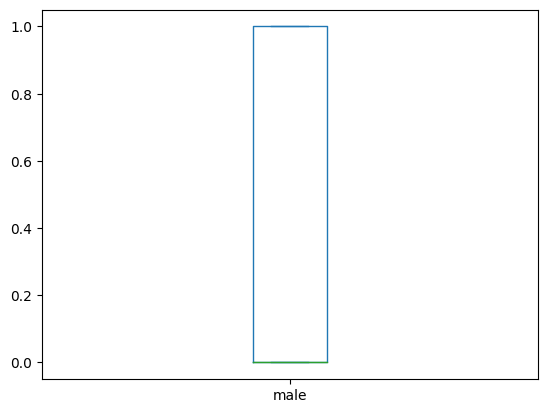

In [43]:
df.male.plot(kind='box')

In [44]:
df.isna().tail(20)

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4132,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4133,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4134,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4135,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4136,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4137,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4138,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4140,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


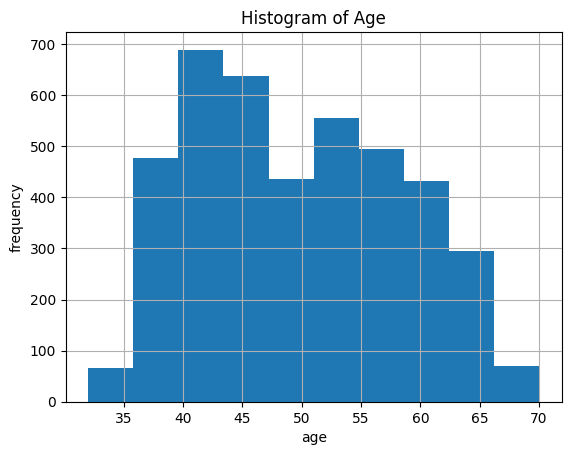

In [45]:
df.age.hist()
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("Histogram of Age")
plt.show()

<Axes: ylabel='Frequency'>

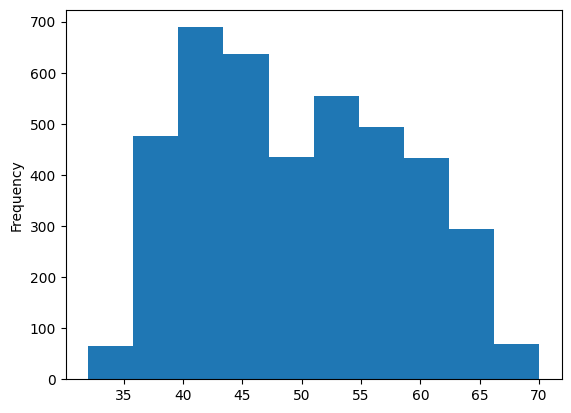

In [46]:
df.age.plot(kind="hist")

In [47]:
df.nunique(axis=0)

index
male                  2
age                  39
currentSmoker         2
cigsPerDay           34
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               145
BMI                1353
heartRate            74
glucose             143
TenYearCHD            2
dtype: int64

<Axes: ylabel='count'>

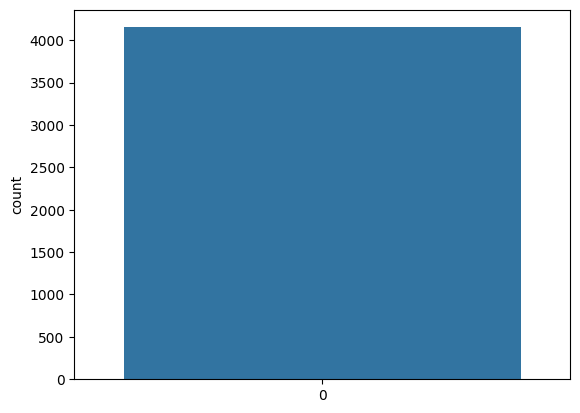

In [51]:
sns.countplot(df.currentSmoker)

<Axes: ylabel='TenYearCHD'>

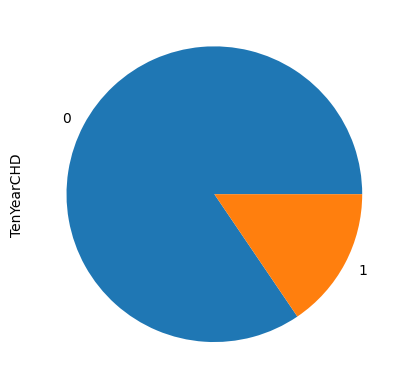

In [176]:
# df.groupby('diabetes').diabetes.count().plot(kind='pie')
df.groupby('TenYearCHD').TenYearCHD.count().plot(kind='pie')


<Axes: ylabel='Frequency'>

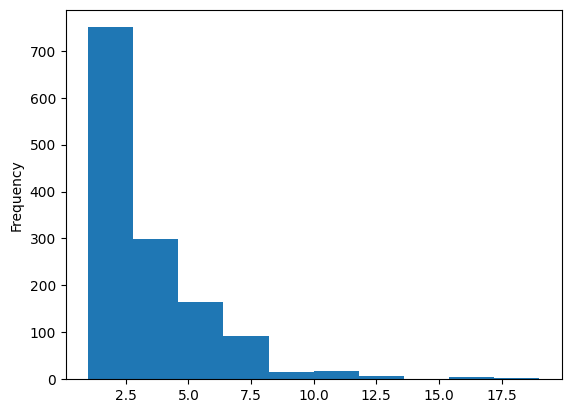

In [63]:
df.groupby('BMI').BMI.count().plot(kind = 'hist')

<Axes: ylabel='BMI'>

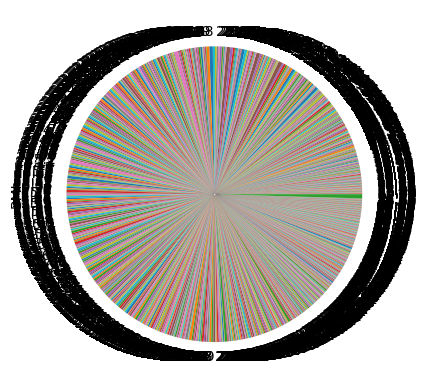

In [67]:
df.groupby('BMI').BMI.count().plot(kind = 'pie')

In [70]:
df.head(40)

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.3,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [137]:
x=df.iloc[:,:-1].values
y = df.iloc[:,-1:].values
x_column_names = df.columns[:-1].tolist()
y_column_name = df.columns[-1]

# print("Column names of x:", x_column_names)
print("Column name of y:", y_column_name)

Column name of y: TenYearCHD


In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [99]:
logisticRegression = LogisticRegression()
logisticRegression.fit(x_train, y_train)

LR = logisticRegression.predict(x_test)
print("Accuracy")
accuracy_score(y_test, LR)


Accuracy


/home/code/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/code/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8291215403128761

In [106]:
accuracy = accuracy_score(y_test, LR)
precision = precision_score(y_test, LR)
recall = recall_score(y_test, LR)
f1_score = f1_score(y_test, LR)
print("Accuracy_Score = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("F1 Score b = ",f1_score)

Accuracy_Score =  0.8291215403128761
Precision =  0.5625
Recall =  0.0625
F1 Score b =  0.1125


In [144]:
logisticRegression.fit(x,y)

/home/code/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/code/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [145]:
model_file= "heart_model.sav"
pickle.dump(logisticRegression,open(model_file,"wb"))

In [146]:
loadmodel = pickle.load(open(model_file,'rb'))

In [180]:
df.head()

index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0


In [4]:
male = input("Please enter yout gender 0 for femele and 1 for male")
age = input("Please enter your age")
currentSmoker = input("Please enter yout currentSmoker 1 for yes and 0 for no")
cigsPerDay = input("Please enter your cigsPerDay")
BPMeds = input("Please enter your BPMeds 1 for yes and 0 for no")
prevalentStroke = input("Please enter your prevalentStroke 1 for yes and 0 for no")
prevalentHyp = input("Please enter your prevalentHyp 1 for yes and 0 for no")
diabetes = input("Please enter your diabetes 1 for yes and 0 for no")
totChol = input("Please enter your totChol")
sysBP = input("Please enter your sysBP")
diaBP = input("Please enter your diaBP")
BMI = input("Please enter your BMI")
heartRate = input("Please enter your heartRate")
glucose = input("Please enter your glucose")


Please enter yout gender 0 for femele and 1 for male 1
Please enter your age 44
Please enter yout currentSmoker 1 for yes and 0 for no 0
Please enter your cigsPerDay 0
Please enter your BPMeds 1 for yes and 0 for no 1
Please enter your prevalentStroke 1 for yes and 0 for no 1
Please enter your prevalentHyp 1 for yes and 0 for no 1
Please enter your diabetes 1 for yes and 0 for no 0
Please enter your totChol 300
Please enter your sysBP 150
Please enter your diaBP 190
Please enter your BMI 33
Please enter your heartRate 89
Please enter your glucose 78


In [5]:
inputs_df = pd.DataFrame({"male":male,"age":age,"currentSmoker":currentSmoker,"cigsPerDay":cigsPerDay,"BPMeds":BPMeds,"prevalentStroke":prevalentStroke,"prevalentHyp":prevalentHyp,"diabetes":diabetes,"totChol":totChol,"sysBP":sysBP,"diaBP":diaBP,"BMI":BMI,"heartRate":heartRate,"glucose":glucose},index=[0])

NameError: name 'pd' is not defined

In [177]:
print(inputs_df)

  male age currentSmoker cigsPerDay BPMeds prevalentStroke prevalentHyp  \
0    1   1             1          1      1               1            1   

  diabetes totChol sysBP diaBP BMI heartRate glucose  
0        1       1     1     1   1         1       1  


In [178]:
result = loadmodel.predict(inputs_df)

/home/code/.local/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [1]:
if result == 0:
    print("No heart problem")
else:
    print("Risk of heart problem")

NameError: name 'result' is not defined